<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Banking Churn Analysis & Modeling.</p>

    
<img src="https://m.economictimes.com/thumb/msid-100281493,width-1200,height-900,resizemode-4,imgsize-14062/banks-request-rbi-for-more-time-for-new-loan-provisioning-system.jpg" alt="Image Description" width="300" height="200">


<div style="border-radius:10px; border:black solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">


<b>Project Objective:-</b> 

* The **aim** of this project is to train a Machine Learning Model which can find the **key factors** that significantly influence the **customer churn or attrition.**<br>

    
<b>  Project Overview:</b><br>

* **Churn refers** to customers leaving a bank or discontinuing their banking services.<br>
* **Banking Churn Analysis** is a process of studying customer behavior in the banking industry to predict and understand customer attrition or churn.<br>
* **Banking Churn Modeling** aims to identify patterns and factors that contribute to customer churn, enabling banks to take proactive measures to retain customers and improve customer satisfaction.<br>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: grey ; font-size:100%; text-align:left">

<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

<h3 align="left"><font color=brown>📊 Table of Contents:</font></h3>


* **Importing Libraries & Dataset.**
    
    
* **Data Wrangling.**
    * Data Cleaning.
    * Handling Missing Values.
    * Handling Inconsistances.
    
    
* **Exploratory Data Analysis (EDA)**
    * Visualizing Dependent Variable.
    * Visualizing Independent Variables.
    * Generating Insights.
    
    
* **Data Preprocessing.**
    * Variable Selection and Importance.
    * Feature Transformation and Scaling.
    * Splitting Data for Model Training.

    
* **Model Training and Evaluation.**
    * Selection of Classification Algorithms.
    * Model Training and Tuning.
    * Model Evaluation and Performance.
    * Confusion Matrix Analysis.
    * Accuracy, Precision, Recall, and F1 Score.
    * Receiver Operating Characteristic (ROC) Curve and AUC.
    * Interpretation of Evaluation Results.
    * Interpretation and Insights.
    * Key Findings and Patterns.
    * Feature Importance and Contribution.

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Importing Libraries </div> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score,jaccard_score,log_loss
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Loading Dataset</div> 

In [2]:
df = pd.read_csv("C:\\Users\\kumod sharma\\Desktop\\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Data Wrangling</div> 


* **Data wrangling**, also known as **data munging**, refers to the process of **cleaning, transforming, and preparing raw data for analysis.** 
* It involves **handling missing values**, **addressing inconsistencies** and **formatting data** before it can be used for **further analysis**.

### 1. Generating Basic Information.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is total **10000 records** and ***14 columns** availabe in the dataset.
* **Out of 14 columns** there are **11 numerical columns** and **3 categorical columns.**

---

### 2. Computing Total No. of Missing Values.

In [5]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **None** of the columns is having **missing values.**
* So we **don't** have to use technique of **Data Imputation.**

---

### 3. Computing Cardinality of Categorical Columns.

In [6]:
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols].nunique().to_frame().rename(columns={0:"Total No. of Unique Values"})

,Total No. of Unique Values
Surname,2932
Geography,3
Gender,2


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Surname column** is having **very high cardinality.**
* We can also **relate that surname** is **not relevant** for predicting **customer churned or not.** So we can **simply drop this feature.**

### 4. Dropping "Surname" Column.

In [7]:
df.drop(columns=["Surname"],inplace=True)

---

### 5. Showing Random Sample of Data.

In [8]:
df.sample(5)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2220,2221,15806049,714,Germany,Female,49,5,140510.89,1,1,0,141914.94,0
9279,9280,15573854,727,France,Male,62,5,0.00,2,0,1,38652.96,0
3281,3282,15707634,775,France,Female,32,2,108698.96,2,1,1,161069.73,0
9213,9214,15672216,584,France,Female,40,4,82441.75,1,0,0,80852.11,0
2598,2599,15765812,587,Spain,Male,48,1,0.00,2,1,1,8908.00,0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can observe that **RowNumber** and **CustomerId** columns **represents a unique value** for each customer.
* So these features **doesn't seems relevant for predicting customer churned or not.** So we can simply **drop these features.**

### 6. Dropping "RowNumber" & "CustomerId" Column.

In [9]:
df.drop(columns=["RowNumber","CustomerId"],inplace=True)

---

### 7. Renaming Target Column name and its values with more appropirate name for better Analysis.

In [10]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [11]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We have **converted raw data** into **well-structured data** to better analysis.
* So we can perform **Expolatory Data Analysis** and **derive insights from the data.**

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color:black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Explorator Data Analysis</div> 

### 1. Visualizing Target Variable.

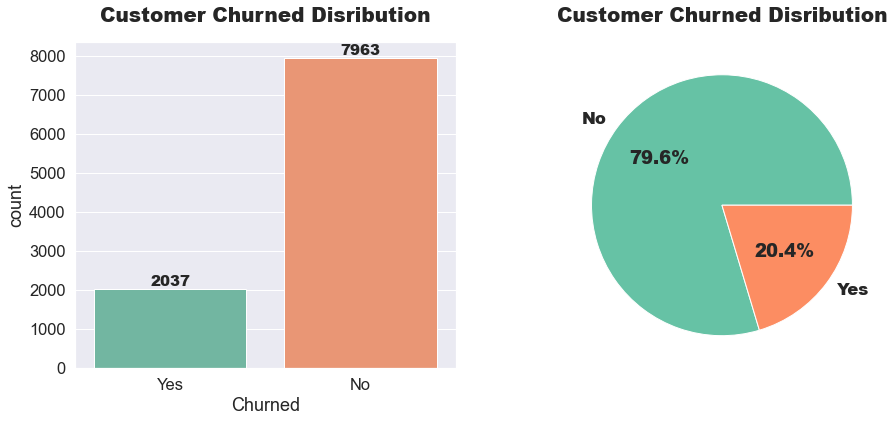

In [14]:
count = df["Churned"].value_counts()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is **huge class-imbalance** which can lead to **bias in model performance.**
* So to **overcome** this **class-imbalance** we have to use technique named **SMOTE.**

---

### 2. Visualizing Customer Churned by Gender.

In [15]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for container in ax.containers:
        ax.bar_label(container,size=15,fontweight="black",color="black")
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

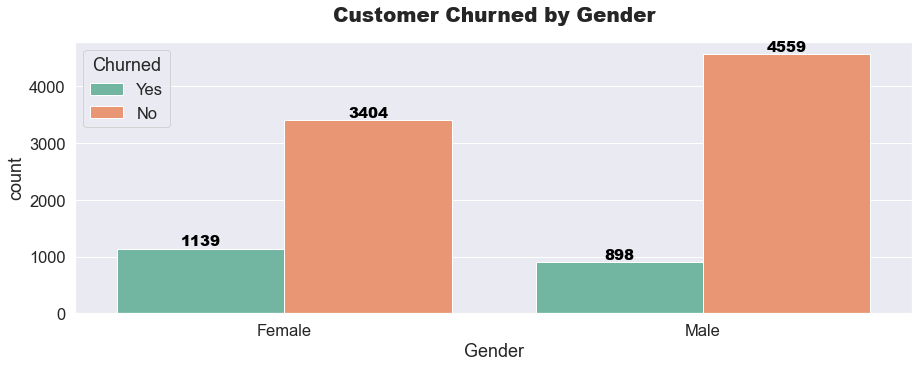

In [16]:
countplot("Gender")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **ratio** of male and female customers is **47: 57**, which suggests that there are **more male customers** than **female customers.**
* **Feamle Customers** have **more churned**, which means **feamle customers** have **more deactivated their bank accounst.**


---

### 3. Visualizing Customer Churned by Geoprahical Region.

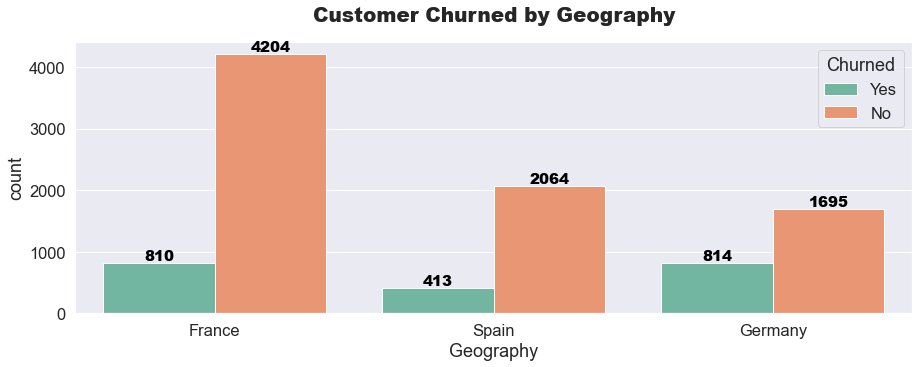

In [17]:
countplot("Geography")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Most** of the customers are from **France** and the **churn rate** in **France is low.** 
* There are **almost equal customers** from **Spain & Germany** regions.
* But the **Churn rate** is **almost double** in **Germany** when **compared with spain.**

---

### 4. Visualizing Customer Churn by "HasCrCard".

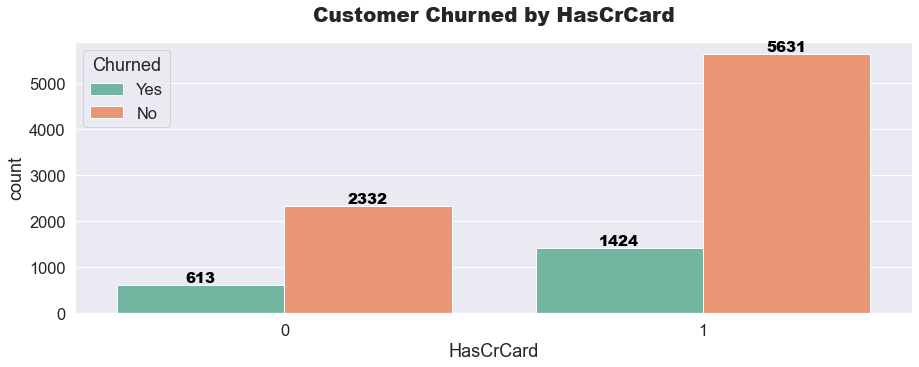

In [18]:
countplot("HasCrCard")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We have **more than double customers** having **credit card** when compared to customers **not having credit cards.**
* **Churn Rate %** of customers **having credit card is 20.1%** whereas customers **not having credit card is 20.8%**
* So we can say **credit card is not affecting the churn of customers.**

---

### 5. Visualizing Customer Churned by "NumOfProducts".

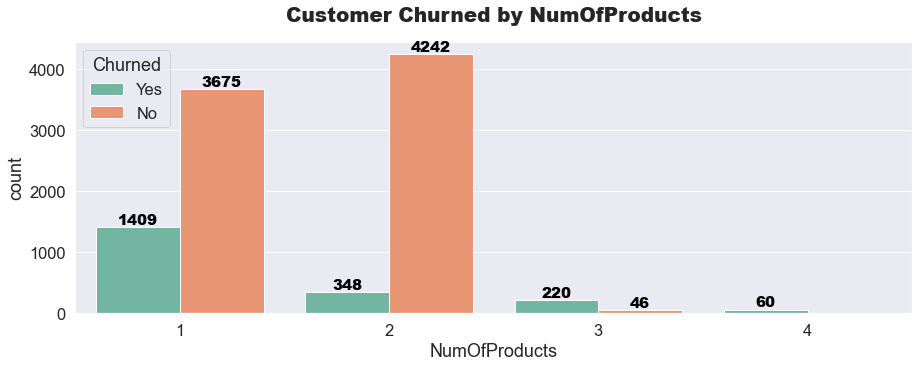

In [19]:
countplot("NumOfProducts")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Most** of the customers are **having only 1 product** and very few customers are **having more than 2 products.**
* But there is **very high churn rate** in customers **having more than 2 Products.**
* The **lowest chur rate** is in customers with **2 products.**
    

* **Note:**
    1. We can do **feature engineering** by **grouping the customers having products more than 2 together** to **reduce the class imbalance.**
    2. **Class Imbalance** leads to **bias in model** and **misrepresentation of minority class.**

---

### 6. Visualizing Customer Churned by "IsActiveMember".

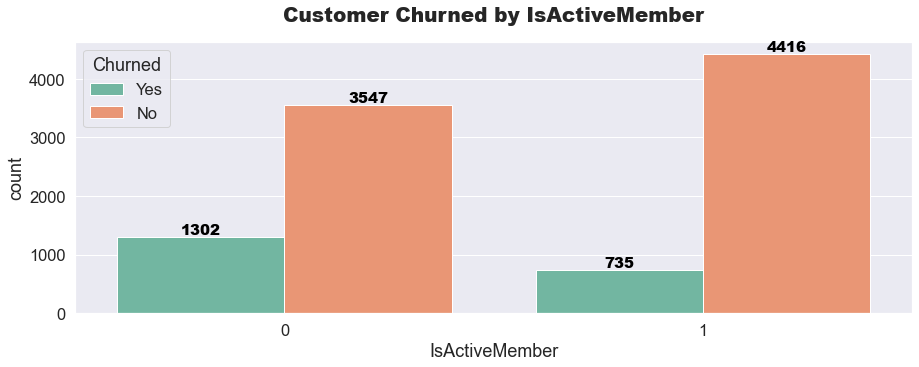

In [20]:
countplot("IsActiveMember")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is **approxiamately equal customer** who are **either active or not active.**
* But the **churn rate %** in **not active customers is 26.8** whereas in **active customers is 14.2%**
* So we can say **customers which are not active are morely likely to deactivate their accounts.**

---

### 7. Visualizing Customer Churned by "Tenure".

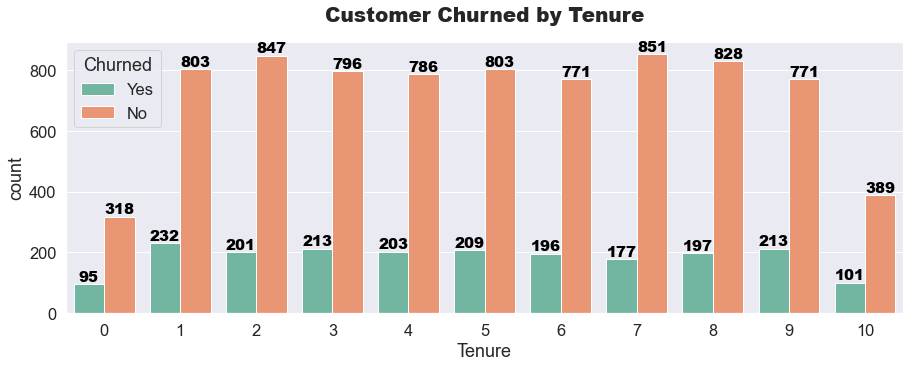

In [21]:
countplot("Tenure")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **highest tenure is 10 years** which means that those customers have **opened their account 10 years back.**
* Since there is **similar distribution of churned status** we can't make any inference.

---

### 8. Visualizing Customer Churned by "CreditScore".

In [22]:
def continous_plot(column):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(df["Churned"],df[column],palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

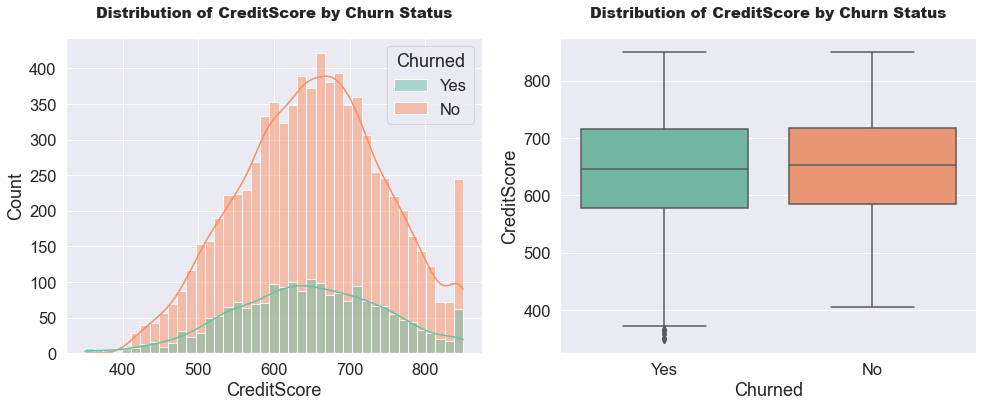

In [23]:
continous_plot("CreditScore")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **Median CreditScore** of **both churned** and **not churned** customers are **approxiamately equal.**
* Since the values are approximately equal we **can't generate any inference** for the the churn categoriers.

---

### 9. Visualizing Customer Churned by "Age".

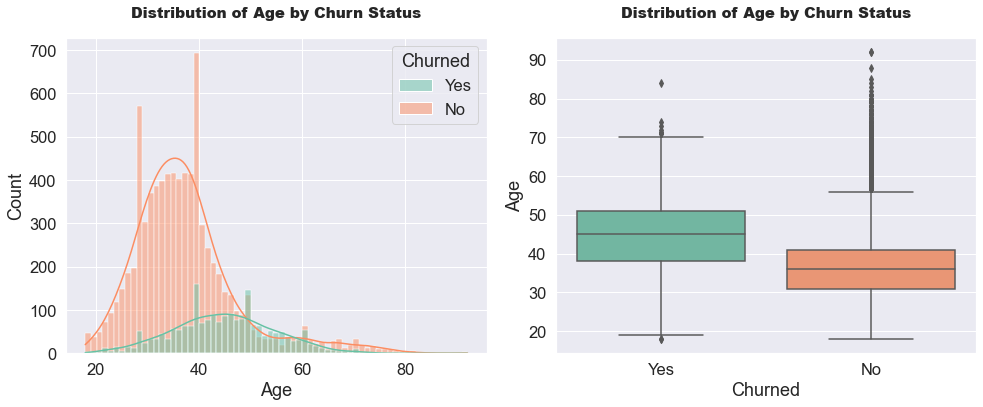

In [24]:
continous_plot("Age")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **distribution is right skewed** because of **presence of outliers** which can lead to **overfitting in model.**
* To **overcome this right-skewed distribution** we have to **remove those outliers.**

---

### 10. Visualizing Customer Churned by "Balance."

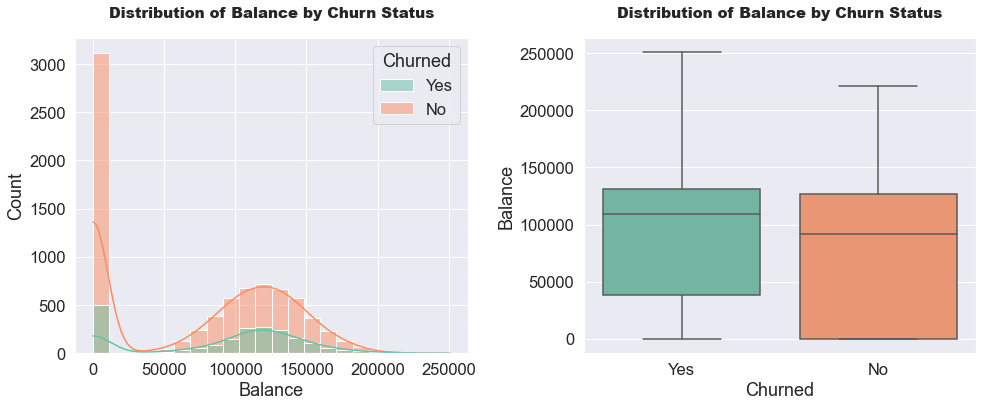

In [25]:
continous_plot("Balance")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **More than 3000 customers** are having their **account balance equal to zero.**
* Customers with **zero balance** are more likely to **deactivate their account.**
* **Excluding the zero value** we can observe a **normal distribution.** So don't have to use any other techniques.

---

### 11. Visualizing Customer Churned by "Estimated Salary".

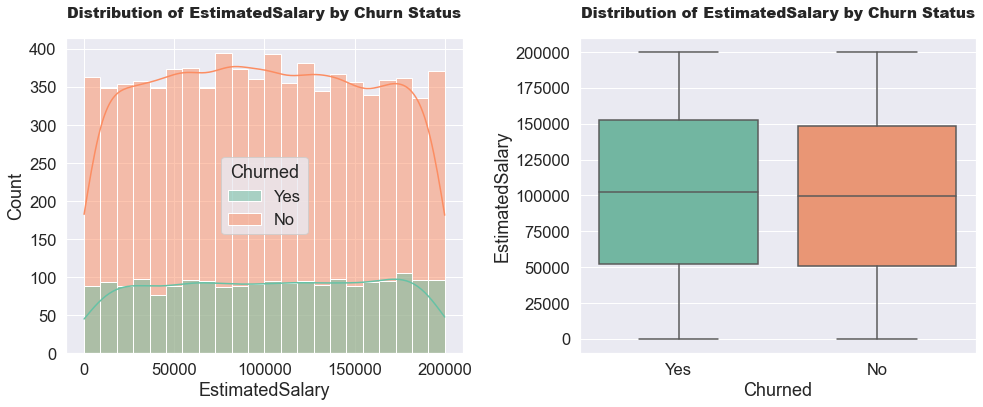

In [26]:
continous_plot("EstimatedSalary")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **median value of EstimatedSalary** is **approxiamately same** for both the **churned categories.**
* Since the distribution is **kind of similar** for **both churn category** we can make any inference.

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Data Preprocessing</div> 

### 1. Detecting Duplicate Records.

In [27]:
print("Total duplicate records present in the dataset is:",df.duplicated().sum())

Total duplicate records present in the dataset is: 0


### 2. Gathering Descriptive Statistical information of Continous Numerical Features.

In [28]:
num_cols = ["CreditScore","Age","Balance","EstimatedSalary"]

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


---

### 3. Computing Unique Values of Categorical Columns.

In [29]:
cat_cols = ["Geography","Gender"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
Unique Values in Gender column is: ['Female' 'Male']


### 4. Label Encoding of Categroical Columns.

In [30]:
encoder = LabelEncoder()

In [31]:
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [32]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

---

### 5. Removing Outliers Using Z-score in "Age" Column.

In [33]:
z_score = np.abs(stats.zscore(df["Age"]))

df = df[(z_score < 3)]

In [34]:
df.shape

(9867, 11)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Earlier we were having **10000 records** after removing outliers we have **9867 records.**
* Total **23 records** were **conatining outliers** in the **age column.**

---

### 6. Segregating Features & Labels for Model Training.

In [35]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

---

### 7. Splitting Data For Model Training & Testing.

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (7893, 10)
Shape of x_test is:  (1974, 10)
Shape of y_train is: (7893,)
Shape of y_test is:  (1974,)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Data is **equally splitted** for **Model Training & Testing.**
* So we can build a **Predictive Model** to find the **key factors** that are significantly influencing **customers churn.**

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Creation using Decision Tree</div> 

### 1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [38]:
dtree = DecisionTreeClassifier(class_weight="balanced")

In [39]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[2,3,4],
              "min_samples_leaf":[1,2,3,4],
              "random_state":[0,42]}

In [40]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]})

In [41]:
print("Best Parameters are:\n")
print(grid_search.best_params_)

Best Parameters are:

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


---

### 2. Creating Model Using Best Parameters.

In [42]:
dtree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=0)

dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=0)

### 3. Computing Model Accuracy.

In [43]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 86.0 %
Accuracy Score of Model on Testing Data  is => 83.64 %


---

### 4. Model Evaluation using Different Metrics.

In [44]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))
print("Jaccard Score of the Model is =>",jaccard_score(y_test,y_test_pred,average="micro"))
print("Log Loss of the Model is =>",log_loss(y_test,y_test_pred))

F1 Score of the Model is => 0.8363728470111449
Recall Score of the Model is => 0.8363728470111449
Precision Score of the Model is => 0.8363728470111449
Jaccard Score of the Model is => 0.7187636047017849
Log Loss of the Model is => 5.651500282187406


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **high values** for **F1 score, recall score, and precision score**, all of which are **approximately 0.84.** 
* These **metrics suggest** that the **model achieves good accuracy** in predicting the **positive class.**
* The **Jaccard score**, with a value of **approx 0.72**, indicates a moderate level of **similarity between the predicted and actual sets of instances.**
* A **lower log loss** indicates **better alignment** between the **predicted probabilities and the actual class labels.**

---

### 5. Finding Importance of Features in DecisionTreeClassifier.

In [45]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

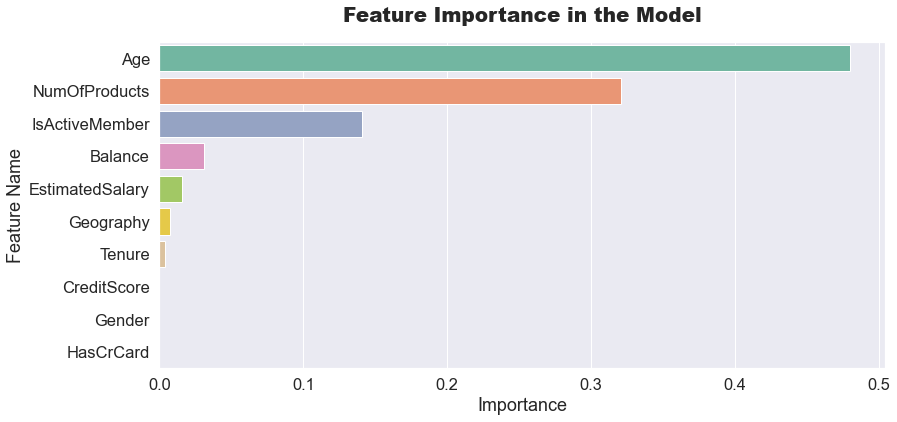

In [46]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="Set2")
plt.title("Feature Importance in the Model", fontweight="black", size=20, pad=20)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **key factors** that significantly influence the **deactivation of customers' bank accounts** are **Age, NumOfProducts, and IsActiveMember.**
* **Gender, HasCard, and CreditScore** have shown to have **minimal impact** on the **deactivation of customers' bank accounts.**

----

### 6. SHAP Summary Plot: Explaining Model Predictions with Feature Importance.

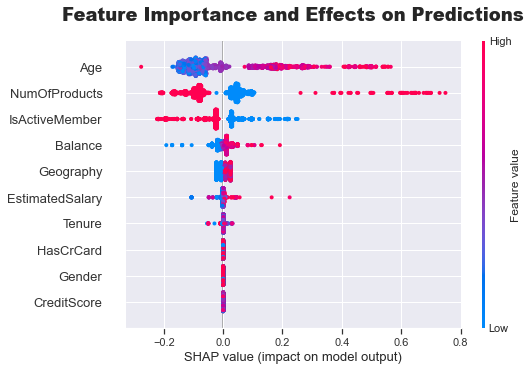

In [48]:
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x_test)
plt.title("Feature Importance and Effects on Predictions",fontweight="black",pad=20,size=18)
shap.summary_plot(shap_values[1], x_test.values, feature_names = x_test.columns)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* In **Age** we can observe that **customer with higher age** are **more likely to deactive banking facilites.**
* In **NumOfProducts** we can observe that **customers with either very low products or very high products** are **more likely to deactive banking facilites.**
* In **IsActiveMember** we can clearly observe **customer which are not active** are **more likely to deactive banking facilites.**
* In **Balance** we can observe that **customers with more balance** are **more likely to deactive banking facilites.**

---

### 7. Model Evaluation using Confusion Matrix.

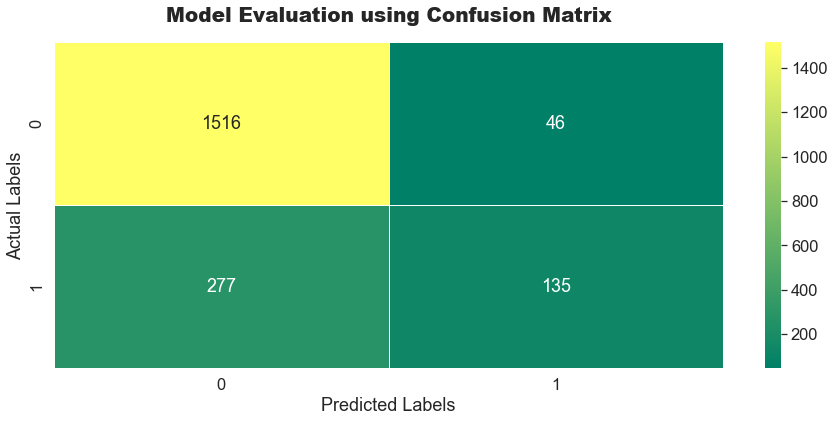

In [49]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="summer")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.

    
* **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

---

### 8. Model Evaluation: ROC Curve and Area Under the Curve (AUC)

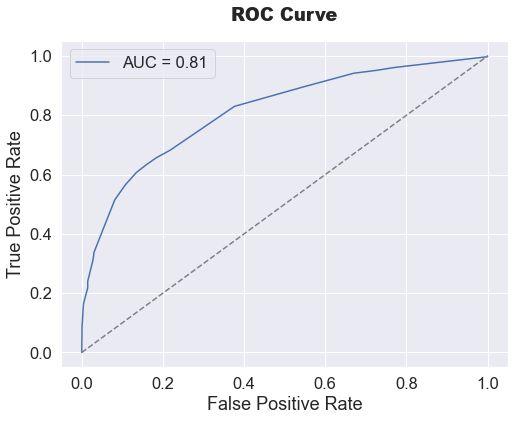

In [75]:
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Strong Discriminative Power:** The model exhibits a strong discriminative power with an AUC value of 0.81. This suggests that the model has a high ability to distinguish between positive and negative instances, indicating its effectiveness in making accurate predictions.

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Conclusion</p>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Key-Points</font></h3>

    
* **High Training and Testing Accuracies:** The model achieved a high accuracy score of 86.0% on the training data, indicating a good fit to the training instances. Additionally, the model's accuracy score of 83.64% on the testing data suggests its ability to generalize well to unseen instances.
    
    
* **High F1 Score, Recall, and Precision:** The model achieved high F1 score, recall, and precision values, all approximately 0.836. This indicates that the model has a strong ability to correctly identify positive cases while minimizing false positives and maximizing true positives.
    

* **Moderate Jaccard Score:** The Jaccard score, with a value of approximately 0.719, suggests that the model effectively captures the intersection between the predicted and true positive sets, indicating a reasonable level of similarity between them.
    
    
* **Acceptable Log Loss:** The model's log loss, with a value of approximately 5.652, indicates that the predicted probabilities align reasonably well with the actual probabilities.
    
    
* **Overall Model Performance:** The model demonstrates strong performance across multiple evaluation metrics, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.

-----